# K-means聚类算法详解

## 1. 算法原理
K-means是一种**无监督学习**的划分式聚类算法，目标是将n个数据点划分为K个簇，使得簇内样本相似度高、簇间差异大。其数学目标是最小化**簇内平方误差和（SSE）**：
$$
J = \sum_{i=1}^{K} \sum_{x \in C_i} \| x - \mu_i \|^2
$$
其中$\mu_i$为簇$C_i$的质心（均值向量）[3,5](@ref)

## 2. 算法步骤
1. **初始化**：随机选择K个数据点作为初始质心（或使用K-means++优化初始化）[4](@ref)
2. **分配阶段**：计算每个点到质心的距离（默认欧氏距离），分配到最近质心的簇[6](@ref)
3. **更新阶段**：重新计算每个簇的质心（均值点）[7](@ref)
4. **迭代**：重复2-3步，直到质心变化小于阈值或达到最大迭代次数[2](@ref)

## 3. 关键实现细节
### 3.1 距离度量
- **欧氏距离**（默认）：$\sqrt{\sum (x_i-y_i)^2}$，适合连续型数据[1](@ref)
- **余弦距离**：适合高维稀疏数据（如文本）[1](@ref)
- **曼哈顿距离**：对异常值更鲁棒[1](@ref)

### 3.2 质心初始化优化
- **K-means++**：按概率选择远离已有质心的点，降低局部最优风险[4,9](@ref)
- **随机多次初始化**：选择SSE最小的结果[6](@ref)

### 3.3 收敛条件
- 质心移动距离<阈值（如1e-4）
- 最大迭代次数（通常100-500次）[7](@ref)

## 4. 优缺点分析
### 优点
- 计算效率高，时间复杂度$O(nKt)$（t为迭代次数）[5](@ref)
- 实现简单，适合大规模数据[6](@ref)
- 对球形簇效果良好[3](@ref)

### 缺点
- 需预先指定K值[4](@ref)
- 对初始质心敏感，可能陷入局部最优[9](@ref)
- 不适合非凸簇或大小差异大的簇[5](@ref)
- 对噪声和异常值敏感[8](@ref)

## 5. 改进算法
| 变体          | 核心改进                          | 适用场景                  |
|---------------|-----------------------------------|---------------------------|
| K-means++     | 优化初始质心选择                  | 通用                      |
| Mini-Batch    | 用小批量数据更新质心              | 超大规模数据[5](@ref)  |
| K-medoids     | 用实际数据点代替均值作质心        | 含离群点数据[4](@ref)  |
| Spectral      | 结合图论切割                      | 非凸形状簇[3](@ref)    |

## 6. Python实现示例
### 6.1 使用Scikit-learn
```python
from sklearn.cluster import KMeans
import numpy as np

# 生成模拟数据
X = np.random.rand(100, 2)

# 训练模型
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300)
kmeans.fit(X)

# 获取结果
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io

In [16]:
def loadData():
    data = np.loadtxt('data/cluster_data.csv',delimiter=',')
    return data

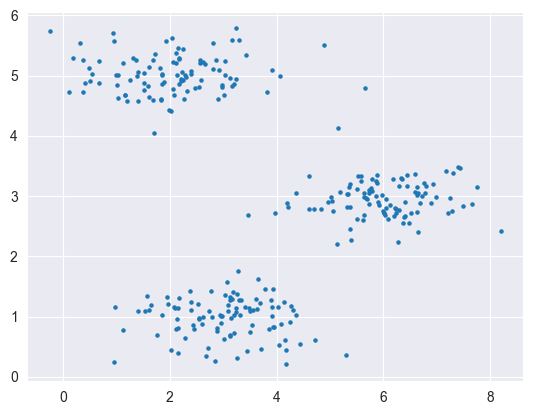

In [17]:
X= loadData()
plt.scatter(X[:,0],X[:,1],marker='o',s=5)

# 初始化质心
实际是从数据中随机抽取k个点作为质心，如果不从X中选，则从数据中随机抽取k个点作为质心

In [18]:
def kMeansInitCentroids(X, k):
    index = np.random.choice(len(X), k, replace=False)
    return X[index]


# 计算数据点到质心的距离，并判断数据点属于哪个质心

In [19]:
def findClosestCentroids(X, centroids):
    #idx中数据表明对应X的数据是属于哪一个质心的
    idx = np.zeros(len(X)).reshape( X.shape[0],-1)
    for i in range(len(X)):
        minDistance = float('inf');#初始无限大
        index = 0
        for k in range(len(centroids)):
            #距离计算，使用欧几里得距离
            distance = np.sum(np.power(X[i]-centroids[k],2))
            if(distance<minDistance):
                minDistance = distance
                index = k
        idx[i]=index
    return idx

# 重新计算聚类中心

In [20]:
def computeCentroids(X, idx):
    k = set(np.ravel(idx).tolist()) #找到所有聚类中心索引
    k = list(k)
    centroids = np.ndarray((len(k),X.shape[1]))
    for i in range(len(k)):
        #选择数据X中类别为k[i]的数据
        data = X[np.where(idx==k[i])[0]]
        #重新计算聚类中心
        centroids[i] = np.sum(data,axis=0)/len(data)
    return centroids

In [21]:
# Kmeans

In [22]:
def k_means(X, k, max_iters):
    initial_centroids = kMeansInitCentroids(X,k)
    #迭代
    for i in range(max_iters):
        if i==0:
            centroids = initial_centroids
        #计算样本到质心的距离，并返回每个样本所属的质心
        idx = findClosestCentroids(X, centroids)
        #重新计算聚类中心
        centroids = computeCentroids(X, idx)
    return idx,centroids

In [23]:
idx,centroids = k_means(X, 3, 8)
print(idx)
print(centroids)

[[2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

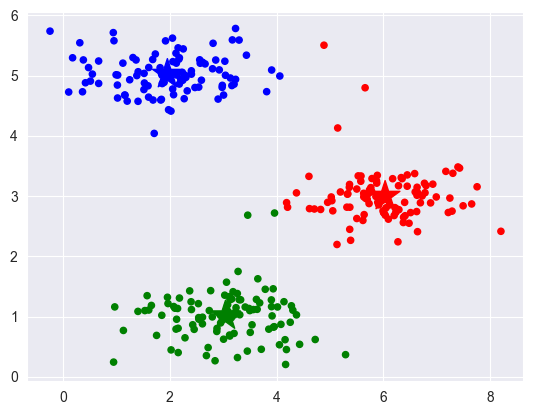

In [24]:
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.scatter(X[:, 0], X[:, 1], c=np.ravel(idx), cmap=cm_dark, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(len(centroids)), cmap=cm_dark, marker='*', s=500)
plt.show()


# sklearn实现

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io
from sklearn.cluster import KMeans
X = loadData()

In [29]:
model = KMeans(n_clusters=3,max_iter = 100)
model.fit(X)

KMeans(max_iter=100, n_clusters=3)

In [30]:
print(model.labels_)
print(model.cluster_centers_)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0]
[[1.95399466 5.02557006]
 [6.03366736 3.00052511]
 [3.04367119 1.01541041]]


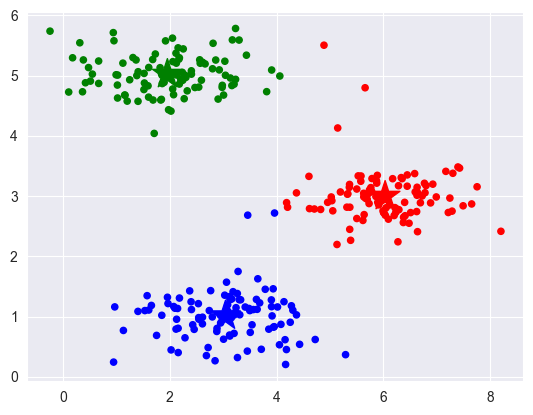

In [31]:
cm_dark = mpl.colors.ListedColormap(['g', 'r','b'])
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=cm_dark, s=20)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c=np.arange(len(model.cluster_centers_)), cmap=cm_dark, marker='*', s=500)
